Anggota :
- Alviatul Nazila
- Clarissa Sanindita Reikisyifa
- Paizal Merdijaya

#Pengenalan

##Latar Belakang

Pada era digital saat ini, layanan transportasi berbasis aplikasi telah menjadi bagian integral dari kehidupan sehari-hari banyak orang. Layanan seperti Lyft, Uber, dan lainnya memungkinkan konsumen untuk memesan tumpangan dengan mudah melalui ponsel mereka, menawarkan kenyamanan dan efisiensi yang tak tertandingi oleh moda transportasi tradisional.

Salah satu aspek paling menarik dari layanan ini adalah penentuan harga. Banyak dari platform ini memanfaatkan algoritma harga dinamis yang menyesuaikan biaya tumpangan berdasarkan berbagai faktor, seperti permintaan, waktu, cuaca, dan banyak lagi. Untuk perusahaan transportasi, pemahaman mendalam tentang dinamika harga ini adalah kunci untuk meningkatkan pendapatan dan efisiensi operasional.

Dalam konteks ini, kami memilih untuk menganalisis dataset yang berkaitan dengan perjalanan yang dipesan melalui layanan Lyft di kota tertentu. Analisis data ini dapat memberikan wawasan berharga tentang bagaimana faktor-faktor tertentu mempengaruhi harga, serta bagaimana perusahaan bisa mengoptimalkan strategi penentuan harga mereka.

##Deskripsi Data

Dataset yang digunakan dalam penelitian ini berisi informasi tentang perjalanan yang dipesan melalui layanan Lyft. Spesifikasi data sebagai berikut:

Jumlah Data: 6 entri (sampel)
- Kelas: Terdiri dari berbagai jenis layanan Lyft seperti 'Shared', 'Lux', 'Lyft', 'Lux Black XL', 'Lyft XL', dan 'Lux Black'.

- Sumber Data: Data ini diambil dari kaggle

- Link Data : https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma


Beberapa kolom penting dalam dataset ini meliputi:
- timestamp, hour, day, month, datetime: informasi waktu pemesanan.
source, destination: lokasi awal dan tujuan perjalanan.

- cab_type, product_id, name: informasi tentang jenis layanan Lyft.
price: harga tumpangan.
distance: jarak perjalanan

-surge_multiplier: pengali tarif yang digunakan saat permintaan tinggi.
temperature, apparentTemperature, humidity, windSpeed, dll.: data cuaca pada saat pemesanan.

##Tujuan Penelitian

Tujuan dari penelitian ini adalah:

- Memahami dinamika penentuan harga dalam layanan transportasi berbasis aplikasi seperti Lyft.

- Menganalisis bagaimana berbagai faktor, terutama kondisi cuaca, mempengaruhi harga tumpangan.

- Memberikan rekomendasi kepada perusahaan transportasi tentang bagaimana mengoptimalkan strategi penentuan harga mereka berdasarkan analisis data.

Dengan memahami hubungan antara faktor-faktor ini dan harga, kita dapat memberikan wawasan berharga yang dapat membantu perusahaan transportasi dalam mengambil keputusan bisnis yang lebih tepat dan efisien

#Import Library

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from io import StringIO
from plotnine import ggplot, aes, geom_point
from sklearn import linear_model
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

#Load Data

In [71]:
df = pd.read_csv('rideshare_kaggle.csv')

In [72]:
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1.544969e+09,34.19,1.545048e+09,37.95,1.544969e+09,27.39,1.545044e+09,partly-cloudy-night,32.70,1021.98,57.0,0.72,0.0,10.000,303.8,1.544962e+09,1.544995e+09,0.30,0.1276,1.544980e+09,39.89,1.545012e+09,43.68,1.544969e+09,33.73,1.545012e+09,38.07,1.544958e+09
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1.543252e+09,42.10,1.543298e+09,43.92,1.543252e+09,36.20,1.543291e+09,rain,41.83,1003.97,90.0,1.00,0.0,4.786,291.1,1.543233e+09,1.543267e+09,0.64,0.1300,1.543252e+09,40.49,1.543234e+09,47.30,1.543252e+09,36.20,1.543291e+09,43.92,1.543252e+09
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1.543320e+09,33.10,1.543403e+09,44.12,1.543320e+09,29.11,1.543392e+09,clear-night,31.10,992.28,240.0,0.03,0.0,10.000,315.7,1.543319e+09,1.543353e+09,0.68,0.1064,1.543338e+09,35.36,1.543378e+09,47.55,1.543320e+09,31.04,1.543378e+09,44.12,1.543320e+09
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1.543511e+09,28.90,1.543579e+09,38.53,1.543511e+09,26.20,1.543576e+09,clear-night,26.64,1013.73,310.0,0.00,0.0,10.000,291.1,1.543492e+09,1.543526e+09,0.75,0.0000,1.543507e+09,34.67,1.543550e+09,45.03,1.543511e+09,30.30,1.543550e+09,38.53,1.543511e+09
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1.543421e+09,36.71,1.543478e+09,35.75,1.543421e+09,30.29,1.543460e+09,partly-cloudy-night,28.61,998.36,303.0,0.44,0.0,10.000,347.7,1.543406e+09,1.543440e+09,0.72,0.0001,1.543421e+09,33.10,1.543403e+09,42.18,1.543421e+09,29.11,1.543392e+09,35.75,1.543421e+09


In [73]:

# untuk menampilkan data agar lengkap jadi tidak ada ....
pd.set_option('display.max_columns', 500)

In [74]:
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1.544969e+09,34.19,1.545048e+09,37.95,1.544969e+09,27.39,1.545044e+09,partly-cloudy-night,32.70,1021.98,57.0,0.72,0.0,10.000,303.8,1.544962e+09,1.544995e+09,0.30,0.1276,1.544980e+09,39.89,1.545012e+09,43.68,1.544969e+09,33.73,1.545012e+09,38.07,1.544958e+09
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1.543252e+09,42.10,1.543298e+09,43.92,1.543252e+09,36.20,1.543291e+09,rain,41.83,1003.97,90.0,1.00,0.0,4.786,291.1,1.543233e+09,1.543267e+09,0.64,0.1300,1.543252e+09,40.49,1.543234e+09,47.30,1.543252e+09,36.20,1.543291e+09,43.92,1.543252e+09
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1.543320e+09,33.10,1.543403e+09,44.12,1.543320e+09,29.11,1.543392e+09,clear-night,31.10,992.28,240.0,0.03,0.0,10.000,315.7,1.543319e+09,1.543353e+09,0.68,0.1064,1.543338e+09,35.36,1.543378e+09,47.55,1.543320e+09,31.04,1.543378e+09,44.12,1.543320e+09
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1.543511e+09,28.90,1.543579e+09,38.53,1.543511e+09,26.20,1.543576e+09,clear-night,26.64,1013.73,310.0,0.00,0.0,10.000,291.1,1.543492e+09,1.543526e+09,0.75,0.0000,1.543507e+09,34.67,1.543550e+09,45.03,1.543511e+09,30.30,1.543550e+09,38.53,1.543511e+09
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1.543421e+09,36.71,1.543478e+09,35.75,1.543421e+09,30.29,1.543460e+09,partly-cloudy-night,28.61,998.36,303.0,0.44,0.0,10.000,347.7,1.543406e+09,1.543440e+09,0.72,0.0001,1.543421e+09,33.10,1.543403e+09,42.18,1.543421e+09,29.11,1.543392e+09,35.75,1.543421e+09


In [75]:
# Berfungsi/berguna untuk mendapatkan dimensi atau ukuran dari DataFrame
df.shape

(373875, 57)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373875 entries, 0 to 373874
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           373875 non-null  object 
 1   timestamp                    373875 non-null  float64
 2   hour                         373875 non-null  int64  
 3   day                          373875 non-null  int64  
 4   month                        373875 non-null  int64  
 5   datetime                     373875 non-null  object 
 6   timezone                     373875 non-null  object 
 7   source                       373875 non-null  object 
 8   destination                  373875 non-null  object 
 9   cab_type                     373875 non-null  object 
 10  product_id                   373875 non-null  object 
 11  name                         373875 non-null  object 
 12  price                        344262 non-null  float64
 13 

In [77]:
# Dalam kasus ini kita akan menggunakan copy dari DataFrame aslinya dengan perintah ini
df_clean = df.copy()

In [78]:
# persentase nilai NaN dalam setiap baris
nan_percentage = df_clean.isnull().mean(axis=1) * 100

In [79]:
# Mengatur threshold
threshold_percentage = 10

In [80]:
# Menghapus baris yang mengandung NaN
df_clean = df.dropna()

In [81]:
# Untuk melihat apakah ada nilai null tiap kolomnya
df_clean.isnull().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

In [82]:
# Melihat isi kolom 'price'
price_column = df_clean['price']
print(price_column)

0          5.0
1         11.0
2          7.0
3         26.0
4          9.0
          ... 
373868    18.0
373869     9.5
373870    27.0
373871    14.0
373872     9.5
Name: price, Length: 344261, dtype: float64


Jadi saat ini sudah tidak ada nilai yang Nan di kolom price

In [83]:
df_clean.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1.544969e+09,34.19,1.545048e+09,37.95,1.544969e+09,27.39,1.545044e+09,partly-cloudy-night,32.70,1021.98,57.0,0.72,0.0,10.000,303.8,1.544962e+09,1.544995e+09,0.30,0.1276,1.544980e+09,39.89,1.545012e+09,43.68,1.544969e+09,33.73,1.545012e+09,38.07,1.544958e+09
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1.543252e+09,42.10,1.543298e+09,43.92,1.543252e+09,36.20,1.543291e+09,rain,41.83,1003.97,90.0,1.00,0.0,4.786,291.1,1.543233e+09,1.543267e+09,0.64,0.1300,1.543252e+09,40.49,1.543234e+09,47.30,1.543252e+09,36.20,1.543291e+09,43.92,1.543252e+09
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1.543320e+09,33.10,1.543403e+09,44.12,1.543320e+09,29.11,1.543392e+09,clear-night,31.10,992.28,240.0,0.03,0.0,10.000,315.7,1.543319e+09,1.543353e+09,0.68,0.1064,1.543338e+09,35.36,1.543378e+09,47.55,1.543320e+09,31.04,1.543378e+09,44.12,1.543320e+09
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1.543511e+09,28.90,1.543579e+09,38.53,1.543511e+09,26.20,1.543576e+09,clear-night,26.64,1013.73,310.0,0.00,0.0,10.000,291.1,1.543492e+09,1.543526e+09,0.75,0.0000,1.543507e+09,34.67,1.543550e+09,45.03,1.543511e+09,30.30,1.543550e+09,38.53,1.543511e+09
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1.543421e+09,36.71,1.543478e+09,35.75,1.543421e+09,30.29,1.543460e+09,partly-cloudy-night,28.61,998.36,303.0,0.44,0.0,10.000,347.7,1.543406e+09,1.543440e+09,0.72,0.0001,1.543421e+09,33.10,1.543403e+09,42.18,1.543421e+09,29.11,1.543392e+09,35.75,1.543421e+09


In [84]:
# Melihat apakah ada data yang duplikat
print("Duplicated data :", df_clean.duplicated().sum())

Duplicated data : 0


#Exploration Data

In [85]:
df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,3.738750e+05,373875.000000,373875.000000,373875.000000,344262.000000,373875.000000,373875.000000,373875.000000,373875.000000,373875.000000,373875.000000,373875.000000,373875.000000,373875.000000,373875.000000,373875.000000,3.738750e+05,373874.000000,373874.000000,3.738740e+05,373874.000000,3.738740e+05,373874.000000,3.738740e+05,373874.000000,3.738740e+05,373874.000000,373874.000000,373874.000000,373874.000000,373874.000000,373874.000000,373874.000000,3.738740e+05,3.738740e+05,373874.00000,373874.000000,3.738740e+05,373874.000000,3.738740e+05,373874.000000,3.738740e+05,373874.000000,3.738740e+05,373874.000000,3.738740e+05
mean,1.544041e+09,11.611587,17.852060,11.582941,16.552952,2.190538,1.014231,42.338187,-71.066164,39.571278,35.860972,0.008935,0.145990,0.740952,6.196576,8.478812,1.544040e+09,8.467900,45.023948,1.544045e+09,34.147700,1.544097e+09,41.591251,1.544045e+09,30.135673,1.544094e+09,31.638429,1010.043587,220.134631,0.686571,0.246340,8.467900,313.558774,1.544022e+09,1.544056e+09,0.57962,0.037514,1.544039e+09,33.455917,1.544037e+09,45.240188,1.544042e+09,29.731198,1.544043e+09,41.967351,1.544043e+09
std,6.883969e+05,6.963287,9.985192,0.493073,9.338960,1.140146,0.092715,0.047809,0.020270,6.729243,7.908519,0.026948,0.328974,0.138571,3.148375,5.277077,2.618325e+06,2.603623,5.980908,6.931288e+05,6.377701,6.916226e+05,7.637481,6.935169e+05,8.032512,6.920870e+05,9.139950,13.479749,99.138787,0.358747,0.472479,2.603623,27.865442,6.904673e+05,6.899914e+05,0.24442,0.055306,6.905266e+05,6.477958,6.894152e+05,5.636428,6.895208e+05,7.107402,6.864123e+05,6.922075,6.904717e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,12.130000,0.000000,0.000000,0.380000,0.450000,0.800000,1.543000e+03,0.717000,32.680000,1.543154e+09,17.850000,1.543234e+09,22.620000,1.543187e+09,11.810000,1.543234e+09,4.390000,988.090000,2.000000,0.000000,0.000000,0.717000,269.400000,1.543147e+09,1.543181e+09,0.09000,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543443e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.500000,31.910000,0.000000,0.000000,0.640000,3.410000,4.060000,1.543432e+09,8.432000,42.570000,1.543439e+09,30.170000,1.543489e+09,36.570000,1.543439e+09,27.700000,1.543478e+09,27.490000,999.820000,124.000000,0.370000,0.000000,8.432000,291.100000,1.543406e+09,1.543440e+09,0.30000,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543733e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,35.900000,0.000000,0.000000,0.710000,5.920000,7.560000,1.543756e+09,9.880000,44.660000,1.543784e+09,34.140000,1.543817e+09,40.950000,1.543784e+09,30.030000,1.543817e+09,30.690000,1009.250000,258.000000,0.820000,0.000000,9.880000,307.400000,1.543752e+09,1.543785e+09,0.68000,0.000400,1.543770e+09,34.240000,1.543727e+09,44.660000,1.543784e+09,30.130000,1.543745e+09,40.950000,1.543784e+09
75%,1.544823e+09,18.000000,28.000000,12.000000,22.500000,2.940000,1.000000,42.364700,-71.054200,43.580000,40.010000,0.000000,0.000000,0.880000,8.410000,11.740000,1.544846e+09,9.996000,46.910000,1.544814e+09,38.730000,1.544836e+09,44.090000,1.544818e+09,35.32

Dengan data statistik yang Anda berikan, kita dapat menyimpulkan informasi berikut:

- Jumlah Data: Ada sekitar 693,071 entri dalam dataset.

- Timestamp: Rentang waktu data mencakup sekitar 1.543204×1091.543204×109 hingga 1.545161×1091.545161×109, yang menggambarkan timestamp dalam format Unix

- Hour, Day, Month: Waktu pemesanan berkisar dari jam 0 hingga 23. Tanggal pemesanan mencakup tanggal 1 hingga 30. Data berasal dari bulan 11 dan 12.

- Price (Harga): Harga rata-rata perjalanan adalah $16.55, harga berkisar dari $2.50 hingga $97.50.

- Distance (Jarak): Jarak rata-rata perjalanan adalah sekitar 2.19 mil. Jarak perjalanan berkisar dari 0.02

- dsb

In [86]:
# Membuat plot corr dari df_clean
def plot_corr(df_clean, size=11):
    corr = df_clean.corr()
    fiq, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

<ipython-input-86-34100d3eb247>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


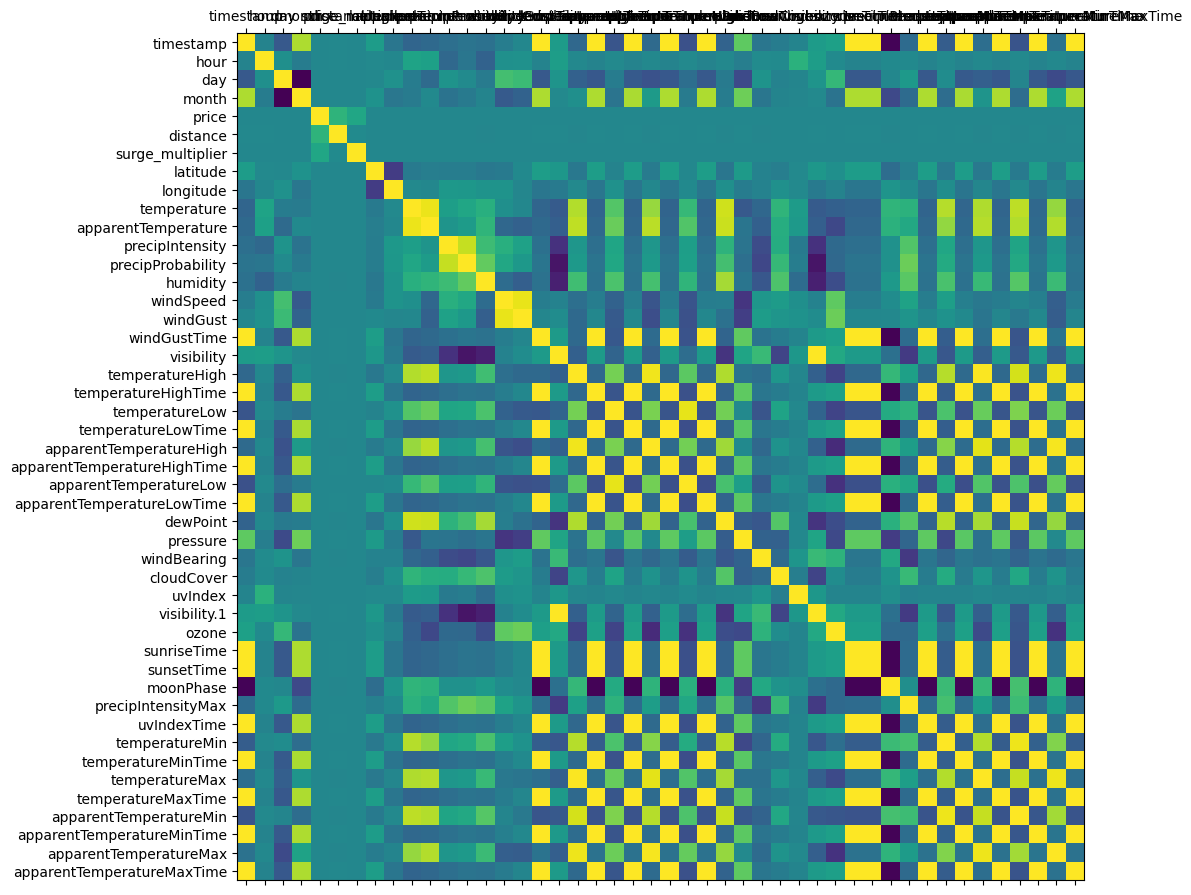

In [87]:
# Menampilkan plot_corr yang telah dibuat
plot_corr(df_clean)

Dapat dilihat bahwa data ini yang berwarna kuning memiliki korelasi yang cukup dekat karena banyak data,jadi warnanya ini sdikit terlihat berantakan,walau demikian data ini tidak ada duplikat jadi karena datanya memiliki nilai yang saling berdekatan.

In [88]:
# Melihat nilainya
df_clean.corr()

<ipython-input-88-39a153212eb6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
timestamp,1.000000,-0.030056,-0.345726,0.772628,0.000133,0.005478,-0.000617,0.166966,-0.133578,-0.253344,-0.229540,-0.180138,-0.145503,-0.166590,-0.070884,0.000336,0.998841,0.157451,-0.230024,0.999329,-0.368861,0.999174,-0.216061,0.999309,-0.403316,0.999202,-0.268065,0.534793,-0.133361,-0.082787,-0.024430,0.157451,0.193825,0.999369,0.999369,-0.845073,-0.212982,0.999362,-0.310164,0.998193,-0.188792,0.999288,-0.380802,0.998283,-0.159095,0.999274
hour,-0.030056,1.000000,0.063059,-0.078371,0.001038,0.004643,0.000999,0.017526,-0.003582,0.218931,0.199196,-0.233560,-0.129750,-0.274643,0.071982,0.076744,-0.030062,0.173722,0.006098,-0.029807,0.013856,-0.028704,0.007268,-0.029971,0.016695,-0.028861,0.005596,-0.066719,0.037020,0.028865,0.328325,0.173722,0.030513,-0.029474,-0.029472,0.024733,0.021180,-0.029454,0.015444,-0.028882,0.003691,-0.029925,0.015964,-0.029573,0.004475,-0.029747
day,-0.345726,0.063059,1.000000,-0.862545,-0.001327,-0.000452,-0.001445,0.003961,0.076898,-0.081649,-0.221747,0.092611,0.031067,-0.090434,0.441920,0.405057,-0.340903,0.104934,-0.280593,-0.347562,-0.083359,-0.338087,-0.396231,-0.347734,-0.188670,-0.340018,-0.098293,-0.445938,0.091028,-0.038692,-0.015876,0.104934,0.376285,-0.345549,-0.345493,-0.002953,0.147527,-0.345676,0.042608,-0.338545,-0.301699,-0.348956,-0.015236,-0.339533,-0.442044,-0.348831
month,0.772628,-0.078371,-0.862545,1.000000,0.000947,0.003165,0.000623,0.086916,-0.123782,-0.085628,0.022158,-0.154954,-0.096788,-0.023287,-0.337921,-0.274769,0.768750,0.010552,0.065407,0.773502,-0.142681,0.767001,0.150973,0.773610,-0.090202,0.768323,-0.078135,0.590418,-0.134026,-0.019030,-0.008877,0.010552,-0.150230,0.772159,0.772121,-0.453692,-0.214704,0.772240,-0.196132,0.766786,0.101913,0.774423,-0.195143,0.767515,0.212642,0.774328
price,0.000133,0.001038,-0.001327,0.000947,1.000000,0.346428,0.241535,0.002146,-0.002049,0.000506,-0.000227,0.000894,-0.000884,-0.002513,0.002396,0.003086,0.000082,0.001891,-0.001107,0.000059,0.000070,0.000048,-0.001043,0.000045,0.001029,0.000039,-0.000839,-0.000110,0.000580,0.002365,-0.000021,0.001891,0.000951,0.000049,0.000049,-0.000012,0.001398,0.000054,-0.000526,0.000044,-0.000674,0.000022,-0.001133,0.000065,-0.000446,0.000009
distance,0.005478,0.004643,-0.000452,0.003165,0.346428,1.000000,0.025748,0.003040,-0.002995,-0.003321,-0.003732,0.001100,0.001655,-0.006500,0.002254,0.002030,0.005382,0.005239,-0.006289,0.005373,-0.002355,0.005341,-0.005688,0.005356,-0.002182,0.005367,-0.005574,0.004190,-0.004330,-0.000846,0.001724,0.005239,0.001895,0.005312,0.005312,-0.005530,0.002364,0.005315,-0.003347,0.005048,-0.006316,0.005344,-0.004081,0.005241,-0.005794,0.005349
surge_multiplier,-0.000617,0.000999,-0.001445,0.000623,0.241535,0.025748,1.000000,-0.002918,-0.000229,0.002581,0.002364,-0.002824,-0.003492,-0.001384,-0.001192,-0.001638,-0.000804,-0.000706,0.002448,-0.000659,-0.001095,-0.000593,0.001989,-0.000642,-0.001287,-0.000621,0.001111,-0.003119,0.002853,-0.001003,0.000232,-0.000706,0.000917,-0.000615,-0.000615,0.002811,-0.000994,-0.000615,0.001546,-0.000511,0.002691,-0.000675,0.001120,-0.000669,0.002344,-0.000646
latitude,0.166966,0.017526,0.003961,0.086916,0.002146,0.003040,-0.002918,1.000000,-0.532282,-0.098901,-0.066167,-0.075792,-0.072781,-0.116657,-0.102570,0.019606,0.171551,0.123930,-0.113260,0.172537,-0.030551,0.170008,-0.089

Ini adalah hasil lengkap yang menjelaskan isi korelasinya antar data

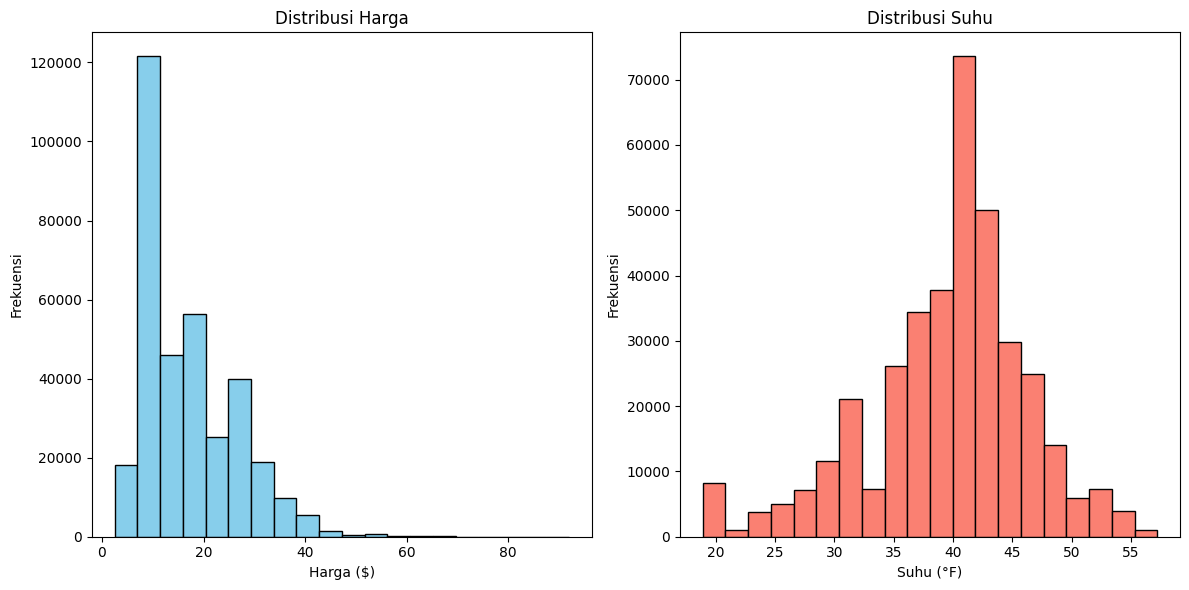

In [89]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df["price"], bins=20, color="skyblue", edgecolor="black")
plt.title("Distribusi Harga")
plt.xlabel("Harga ($)")
plt.ylabel("Frekuensi")

plt.subplot(1, 2, 2)
plt.hist(df["temperature"], bins=20, color="salmon", edgecolor="black")
plt.title("Distribusi Suhu")
plt.xlabel("Suhu (°F)")
plt.ylabel("Frekuensi")

plt.tight_layout()
plt.show()

1. Distribusi Harga:
   - Mayoritas harga tampaknya berkumpul di kisaran yang lebih rendah, menunjukkan bahwa banyak tumpangan memiliki biaya yang relatif lebih rendah
   - Ada beberapa puncak atau modus pada distribusi, menunjukkan beberapa titik harga yang paling umum ada pada rentang harga 20$

2. Distribusi Suhu:
   - Suhu tampaknya memiliki distribusi yang lebih merata daripada harga.
   - Ada beberapa kisaran suhu di mana frekuensinya sedikit lebih tinggi, menunjukkan bahwa beberapa suhu lebih umum selama periode waktu yang dianalisis pada rentang 40°F - 45°F.

In [90]:
grouped = df.groupby("name")["price"].mean().sort_values(ascending=False)
grouped

name
Lux Black XL    32.340479
Black SUV       30.307895
Lux Black       23.066820
Black           20.540992
Lux             17.777636
UberXL          15.687982
Lyft XL         15.310199
WAV              9.770392
UberX            9.768738
Lyft             9.607055
UberPool         8.759519
Shared           6.028279
Taxi                  NaN
Name: price, dtype: float64

Dapat dilihat bahwa "Lux Black XL" memiliki harga rata-rata tertinggi, sedangkan "Shared" memiliki harga rata-rata terendah.

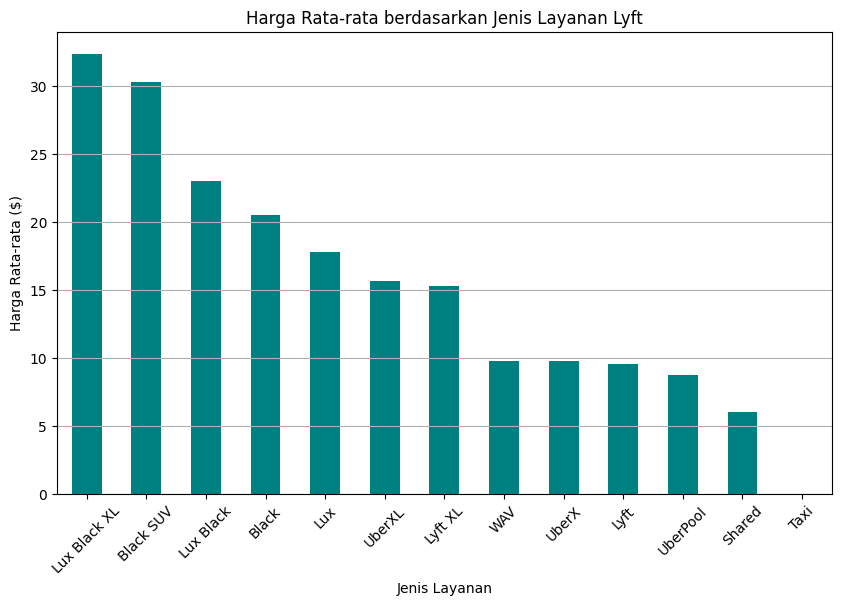

In [91]:
plt.figure(figsize=(10, 6))
grouped.plot(kind="bar", color="teal")
plt.title("Harga Rata-rata berdasarkan Jenis Layanan Lyft")
plt.xlabel("Jenis Layanan")
plt.ylabel("Harga Rata-rata ($)")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Dari visualisasi di atas, kita dapat dengan jelas melihat perbedaan harga rata-rata berdasarkan jenis layanan Lyft:
- Layanan premium seperti Lux Black XL dan Black SUV memiliki harga rata-rata yang jauh lebih tinggi dibandingkan dengan layanan lainnya.
- Sebagai layanan bersama, Shared memiliki harga rata-rata terendah, yang sesuai dengan ekspektasi karena layanan tersebut memungkinkan penumpang untuk membagi biaya tumpangan dengan orang lain.

# Linier Regression

In [92]:
# proses menentukan data
x = df_clean[['distance', 'hour', 'day', 'month']]
y = df_clean['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [93]:
# Inisialisasi model
model = LinearRegression()
# Melatih model pada data pelatihan
model.fit(x_train, y_train)
#model = LinearRegression()

LinearRegression()

In [94]:
# Bagi dataset menjadi data pelatihan dan data pengujian
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
# Menguji model pada data pengujian
y_pred = model.predict(x_test)

In [95]:
# Membuat prediksi menggunakan model yang dilatih
predictions = model.predict(x_test)

# Menghitung kesalahan metrik
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Menampilkan hasil
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Absolute Error: 7.092081817391425
Mean Squared Error: 76.43910789349195
R^2 Score: 0.12114474908582407


jadi didapati hasil Mean Squared Error sebesar76.43910789349195,
Mean Absolute Error sebesar 7.092081817391425, R^2 Score sebesar 0.12114474908582407.

In [96]:
# Menghitung skor (koefisien determinasi R^2) menggunakan set pelatihan
train_score = model.score(x_train, y_train)
print("Train score:", train_score)

Train score: 0.11973382072362648


Hasil Train score sebesar 0.11973382072362648.

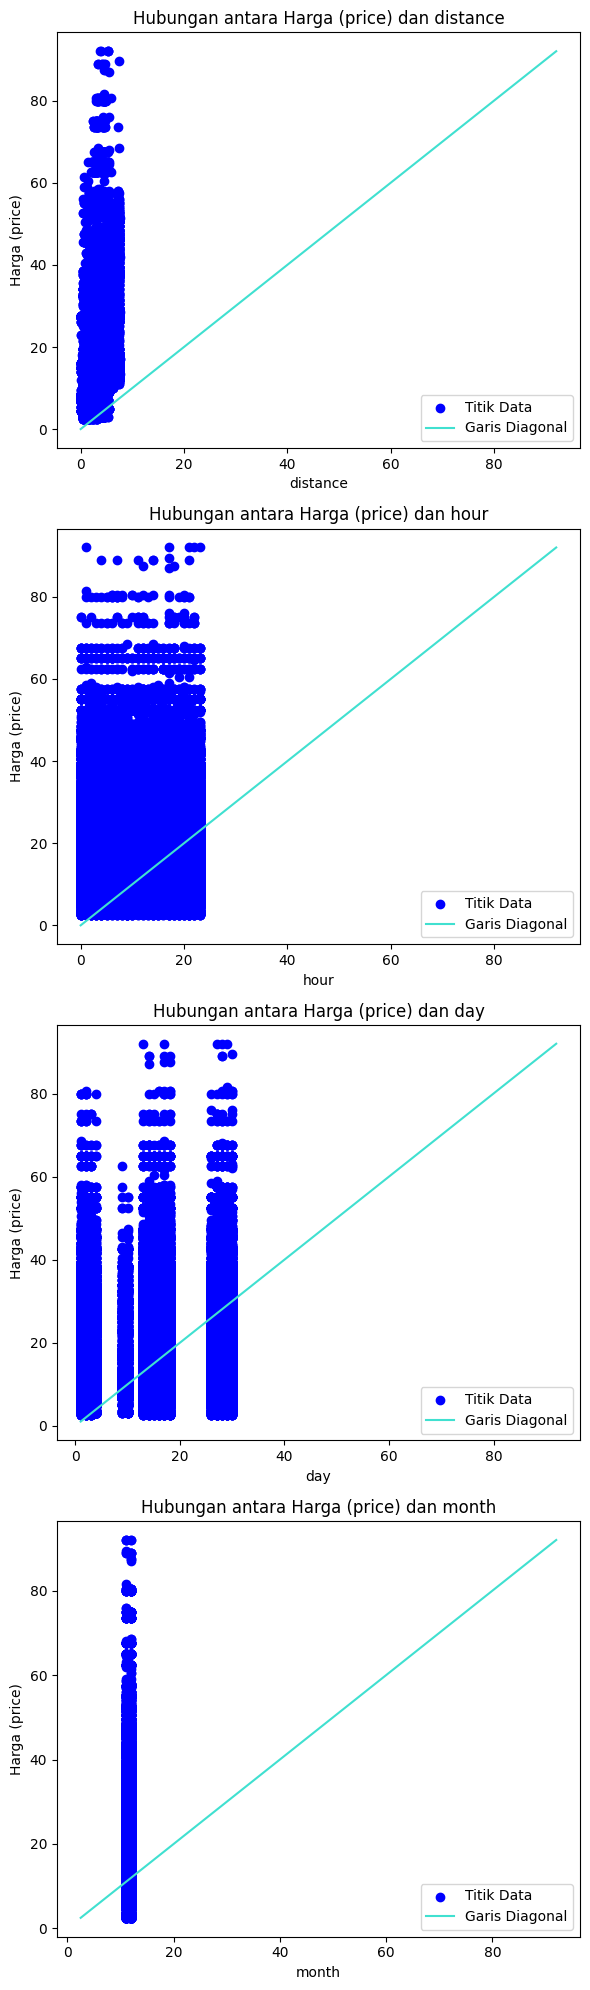

In [97]:
# Kolom yang ingin Anda plot
predicted_columns = ['distance', 'hour', 'day', 'month']
actual_column = 'price'

fig, axes = plt.subplots(len(predicted_columns), figsize=(6, len(predicted_columns)*5))

for i, (ax, column) in enumerate(zip(axes, predicted_columns)):
    # Membuat scatter plot
    ax.scatter(df_clean[column], df_clean[actual_column], color='blue', label='Titik Data')

    # Menambahkan garis diagonal jika perlu
    min_value = min(df_clean[column].min(), df_clean[actual_column].min())
    max_value = max(df_clean[column].max(), df_clean[actual_column].max())
    ax.plot([min_value, max_value], [min_value, max_value], color='turquoise', label='Garis Diagonal')

    # Menambahkan label
    ax.set_title(f"Hubungan antara Harga (price) dan {column}")
    ax.set_ylabel("Harga (price)")
    ax.set_xlabel(f"{column}")

    # Menambahkan legenda
    ax.legend()

plt.tight_layout()
plt.show()

# Menggunakan GridSearchCV

Menggunakan GridSearchCV pada model LinearRegression



In [98]:
params = {
    'fit_intercept': [True, False],
    'n_jobs': [1, 2, 3],
    'copy_X': [True, False],
    'positive': [True, False],
}

grid_search = GridSearchCV(LinearRegression(), params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
print("Best Params: ", best_params)

# Model regresi linier dengan parameter terbaik
lm_best = grid_search.best_estimator_

Best Params:  {'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'positive': False}


Menggunakan GridSearchCV pada model LinearRegression 'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'positive': True.

In [99]:
y_pred = lm_best.predict(x_test)

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

Mean Absolute Error: 7.092081817391425
Mean Squared Error: 76.43910789349195
R-squared: 0.12114474908582407


Menggunakan GridSearchCV  pada model LinearRegression memiliki hasil Mean Absolute Error sebesar 7.092081817391425,Mean Squared Error sebesar 76.43910789349195,
R-squared sebesar  0.12114474908582407 memiliki hasil yang sama dengan menggunakan model LinearRegression tanpa GridSearchCV.

Membuat Model baru LinearRegression

In [100]:
# Membuat objek model Regresi Linier
rfr = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, positive=True)

# Melatih (fit) model dengan data pelatihan
rfr.fit(x_train, y_train)

LinearRegression(n_jobs=1, positive=True)

# Menggunakan model Gradient Boosting Regressor

In [110]:
# Buat objek model GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=42)


In [111]:
# Melatih model pada training data
boosting_model.fit(x_train, y_train)

# Melakukan prediksi pada data pengujian
y_pred = boosting_model.predict(x_test)

In [112]:
# Menilai kinerja model
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

Mean Absolute Error: 7.073311824562155
Mean Squared Error: 75.95499066705284
R-squared: 0.12671086541343546


Jadi hasil Mean Absolute Error sebesar 7.073311824562155, Mean Squared Error sebesar 75.95499066705284, R-squared sebesar 0.12671086541343546

Menggunakan GridSearchCV pada GradientBoostingRegressor

In [105]:
parameters = {
    'learning_rate': [0.01, 0.04],
    'subsample': [0.9, 0.1],
    'n_estimators': [100, 1500],
    'max_depth': [4, 10]
}


# Buat objek RandomizedSearchCV dengan jumlah iterasi yang lebih sedikit
randomized_search = RandomizedSearchCV(gbr, parameters, n_iter=5, cv=5,
                                       scoring='neg_mean_squared_error', n_jobs=-1,
                                       random_state=42)

# Bagi data menjadi sampel pelatihan
sample_size = int(len(x_train) * 0.1)
x_train_sample = x_train.sample(sample_size)
y_train_sample = y_train.sample(sample_size)

# Jalankan RandomizedSearchCV pada sampel pelatihan
randomized_search.fit(x_train_sample, y_train_sample)

# Dapatkan parameter terbaik
best_params = randomized_search.best_params_
print("Best Params: ", best_params)

# Model GradientBoostingRegressor dengan parameter terbaik
gbm_best = randomized_search.best_estimator_

Best Params:  {'subsample': 0.9, 'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.01}


Hasil Menggunakan GridSearchCV pada GradientBoostingRegressor Best Params:  {'subsample': 0.9, 'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.04}

In [113]:
# Membuat prediksi menggunakan model gbm_best
y_pred = gbm_best.predict(x_test)

# Menghitung Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Menghitung Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Menghitung R-squared (R2)
r2 = r2_score(y_test, y_pred)

# Menampilkan hasil evaluasi
print("Mean Absolute Error (MAE): ", mae)
print("Mean Squared Error (MSE): ", mse)
print("R-squared (R2): ", r2)

Mean Absolute Error (MAE):  7.550418608468338
Mean Squared Error (MSE):  87.11705991176508
R-squared (R2):  -0.0016245303953661416


Menggunakan GridSearchCV pada model GradientBoostingRegressor Mean Absolute Error (MAE) sebesar 7.550418608468338, Mean Squared Error (MSE) sebesar 87.11705991176508, R-squared (R2)sebesar -0.0016245303953661416 memiliki perbedaan dari hasil hanya menggunakan model GradientBoostingRegressor tanpa  GridSearchCV.


Membuat Model baru LinearRegression

In [107]:
# Membuat objek model GradientBoostingRegressor
gbr = GradientBoostingRegressor( subsample =  0.9, n_estimators = 100, max_depth = 4, learning_rate = 0.04)

# Melatih (fit) model dengan data pelatihan
gbr.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=0.04, max_depth=4, subsample=0.9)